# Introducing Scikit-Learn

There are several Python libraries which provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

## Data Representation in Scikit-Learn¶

- Features matrix
- Target array

## Basic steps to work with this API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows:

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

sns.set_style(style="whitegrid") # set style

### Supervised learning example: Simple linear regression

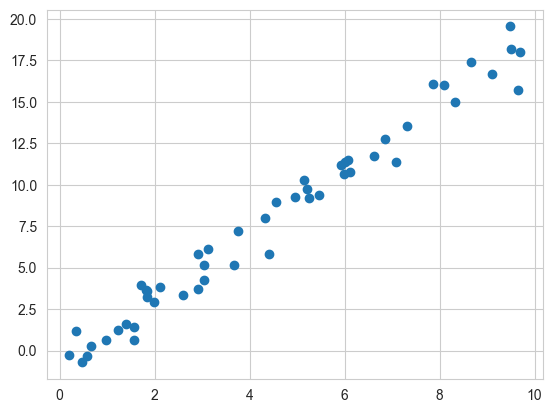

In [11]:
# Supervised learning example: Simple linear regression

rng = np.random.RandomState(42)
x = 10 * rng.rand(50) # uniformly distributed between 0 and 10 [0,1]; features matrix
y = 2 * x - 1 + rng.randn(50) # Linear equation; target array

plt.scatter(x, y);

In [3]:
# 1. Choose a class of model 

# Each model is represented by a Python class, so, we have to import each model like a different class

from sklearn.linear_model import LinearRegression

In [4]:
# 2. Choose model hyperparameters (instantiating)

# Depending on the model class we are working with, we might need to answer one or more questions (instances)

model = LinearRegression(fit_intercept=True) # fit the intercept
model

# We have not yet applied the model to any data, we've just chosen the best model

LinearRegression()

In [12]:
# 3. Arrange data into a features matrix and target vector

print(f'Current features dimension: {x.shape}')
X = x.reshape(50,1)
print(f'New dimension: {X.shape}')

Current features dimension: (50,)
New dimension: (50, 1)


In [13]:
# 4. Fit the model to your data

# We can apply our model using fit()

model.fit(X,y)

LinearRegression()

In [14]:
# In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores

print('The computed slope is: ',model.coef_)
print('The computed intercept is: ', model.intercept_)

# we see that they are very close to the input  slope of 2 and intercept of -1.


The computed slope is:  [1.9776566]
The computed intercept is:  -0.903310725531111


In [18]:
# 5. Predict labels for unknown data

# Now, we want to evaluate it with new data. 
# We use the predict() method

xfit = np.linspace(0,11,50)
xfit = xfit.reshape(50,1)
yfit = model.predict(xfit)

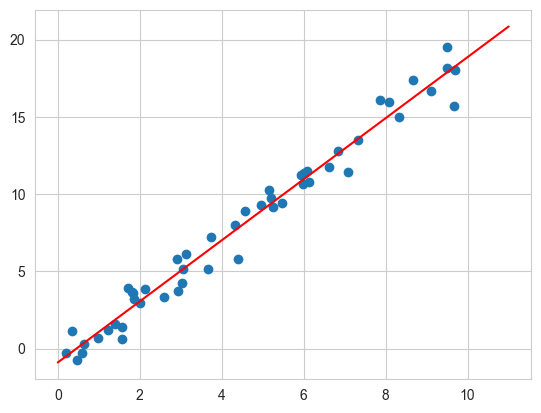

In [19]:
plt.scatter(X, y)
plt.plot(xfit, yfit, color = 'red')
plt.show()

### Supervised learning example: Iris classification

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [46]:
# Holdout set

from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, train_size=0.75)

In [47]:
# 1. Choosing a class of model

from sklearn.neighbors import KNeighborsClassifier

In [48]:
# 2. Choosing model hyperparameters by instanting this class

model = KNeighborsClassifier(n_neighbors=1)

In [49]:
# 3. Arrange data 

print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')

X train shape: (112, 4)
y train shape: (112,)


In [50]:
# 4. Fit the model to your data

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
# Apply the model to new data 

y_predict = model.predict(X_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [54]:
# Evaluate the model on the second set of data
from sklearn.metrics import accuracy_score

print(y_predict == y_test) # there are some falses

print(f'The accuary score is: {round(accuracy_score(y_test, y_predict), 2) * 100}%')

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]
The accuary score is: 97.0%
